In [29]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

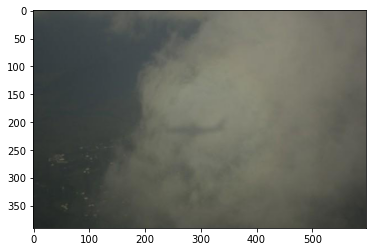

In [5]:
img = iio.imread('q3.jpeg')
plt.imshow(img);

In [41]:
import math
def SSR(img, nRows, nCols, sigma):
    filter_gauss = np.zeros((nRows,nCols))
    centerI = int((nRows+1)/2)
    centerJ = int((nCols+1)/2)
    for j in range(nCols):
        for i in range(nRows):
            g = math.exp(((i-centerI)**2+(j-centerJ)**2)/(-2*sigma**2))
            filter_gauss[i,j] = g
    filter_gauss = filter_gauss/np.sum(filter_gauss)
    y = ndimage.convolve(img, filter_gauss)
    R = np.log10(img) - np.log10(y)
    R = (R-np.min(R))/(np.max(R)-np.min(R))
    return 255*R

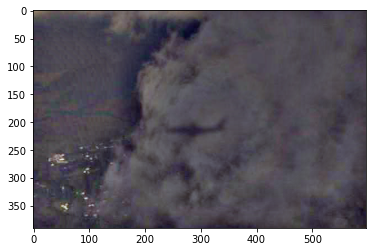

In [43]:
r, c = 100, 100
res1 = np.zeros(img.shape)

res1[:,:,0] = SSR(img[:,:,0],r,c,80)
res1[:,:,1] = SSR(img[:,:,1],r,c,80)
res1[:,:,2] = SSR(img[:,:,2],r,c,80)
#print(np.max(res1))
plt.imshow(res1.astype(np.uint8));
iio.imwrite('q3_ssr.png',res1.astype(np.uint8))

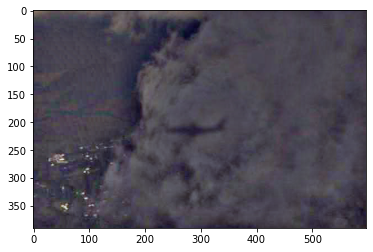

In [48]:
def MSR(img, r, c, sigmas=[15, 80, 250], w=[1/3, 1/3, 1/3]):
    R = np.zeros(img.shape)
    for i in range(len(w)):
        sigma = sigmas[i]
        R = R + SSR(img,r,c,sigma)
    R = (R-np.min(R))/(np.max(R)-np.min(R))    
    return 255*R

res2 = np.zeros(img.shape)

res2[:,:,0] = MSR(img[:,:,0],r,c)
res2[:,:,1] = MSR(img[:,:,1],r,c)
res2[:,:,2] = MSR(img[:,:,2],r,c)
plt.imshow(res2.astype(np.uint8));
iio.imwrite('q3_msr.png',res2.astype(np.uint8))

<ipython-input-41-0e02ad2015bc>:12: RuntimeWarning: divide by zero encountered in log10
  R = np.log10(img) - np.log10(y)
<ipython-input-41-0e02ad2015bc>:13: RuntimeWarning: invalid value encountered in subtract
  R = (R-np.min(R))/(np.max(R)-np.min(R))
<ipython-input-41-0e02ad2015bc>:13: RuntimeWarning: invalid value encountered in true_divide
  R = (R-np.min(R))/(np.max(R)-np.min(R))


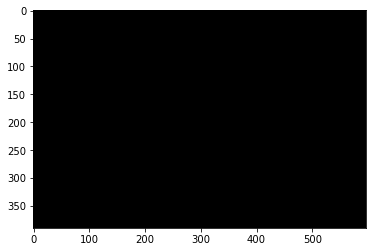

In [49]:
def MSRCR(img, r, c, sigmas=[15, 80, 250], w=[1/3, 1/3, 1/3], beta = 40, alpha = 120):
    R = np.zeros(img.shape)
    for i in range(len(w)):
        sigma = sigmas[i]
        R = R + beta*SSR(alpha*img,r,c,sigma)
    R = (R-np.min(R))/(np.max(R)-np.min(R))    
    return 255*R

res3 = np.zeros(img.shape)

res3[:,:,0] = MSRCR(img[:,:,0],r,c)
res3[:,:,1] = MSRCR(img[:,:,1],r,c)
res3[:,:,2] = MSRCR(img[:,:,2],r,c)
plt.imshow(res3.astype(np.uint8));
iio.imwrite('q3_msrcr.png',res3.astype(np.uint8))